In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file
df = pd.read_excel('C:/Users/saura/Downloads/Myntra_dataset.xls')

# List of columns to keep
columns_to_keep = ['product_name', 'brand_name', 'rating', 'rating_count', 'marked_price', 
                   'discounted_price', 'discount_percent', 'tags']

# Create a new dataframe with only the selected columns
df_cleaned = df[columns_to_keep]

# Display basic information about the cleaned dataset
print(df_cleaned.info())

# Save the cleaned dataset
df_cleaned.to_csv('myntra_cleaned.csv', index=False)
print("\
Cleaned dataset saved as 'myntra_cleaned.csv'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24324 entries, 0 to 24323
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      24324 non-null  object 
 1   brand_name        24324 non-null  object 
 2   rating            24324 non-null  float64
 3   rating_count      24324 non-null  int64  
 4   marked_price      24324 non-null  int64  
 5   discounted_price  24324 non-null  int64  
 6   discount_percent  24324 non-null  int64  
 7   tags              24324 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB
None
Cleaned dataset saved as 'myntra_cleaned.csv'


I removed unnecessary columns and kept only the most relevant ones for our analysis: product_name, brand_name, rating, rating_count, marked_price, discounted_price, discount_percent, and tags.
The cleaned dataset has been saved as 'myntra_cleaned.csv' for future reference.
Dataset Overvi



In [4]:
# Display summary statistics
print("\
Summary statistics:")
print(df_cleaned.describe())


Summary statistics:
             rating  rating_count  marked_price  discounted_price  \
count  24324.000000  24324.000000  24324.000000      24324.000000   
mean       2.183226     64.063846   2472.136532       1492.580044   
std        2.102910    501.299696   2352.000724       1775.429363   
min        0.000000      0.000000     55.000000         49.000000   
25%        0.000000      0.000000   1249.000000        665.000000   
50%        3.300000      5.000000   1990.000000        999.000000   
75%        4.200000     24.000000   2899.000000       1715.000000   
max        5.000000  26900.000000  44950.000000      40900.000000   

       discount_percent  
count      24324.000000  
mean          37.065696  
std           24.745977  
min            0.000000  
25%           15.000000  
50%           40.000000  
75%           59.000000  
max           90.000000  


Key insights from the summary statistics:

The average rating is approximately 2.18 out of 5, with a standard deviation of 2.10.
The average number of ratings per product is about 64, but with a high standard deviation of 501, indicating a wide range of product popularities.
The average marked price is ₹2,472, while the average discounted price is ₹1,493, showing significant discounting.
The average discount percentage is 37.07%.

In [8]:
# Show the first few rows of the cleaned dataset
print("\
First few rows of the cleaned dataset:")
print(df_cleaned.head())


First few rows of the cleaned dataset:
                    product_name  brand_name  rating  rating_count  \
0          Slim Fit Casual Shirt  Greenfibre     0.0             0   
1            Men Printed T-shirt    FREESOUL     0.0             0   
2        Leather Two Fold Wallet   Da Milano     0.0             0   
3  Pure Georgette Bandhani Saree      Mitera     3.6             5   
4    Men Geometric Printed Kurta    Indo Era     0.0             0   

   marked_price  discounted_price  discount_percent  \
0          1699              1699                 0   
1           799               799                 0   
2          4499              4499                 0   
3          6727              1681                75   
4          2599              1429                45   

                                                tags  
0     clothing,men-clothing,shirts,greenfibre-shirts  
1     clothing,men-clothing,tshirts,freesoul-tshirts  
2  accessories,women-accessories,wallets,da-

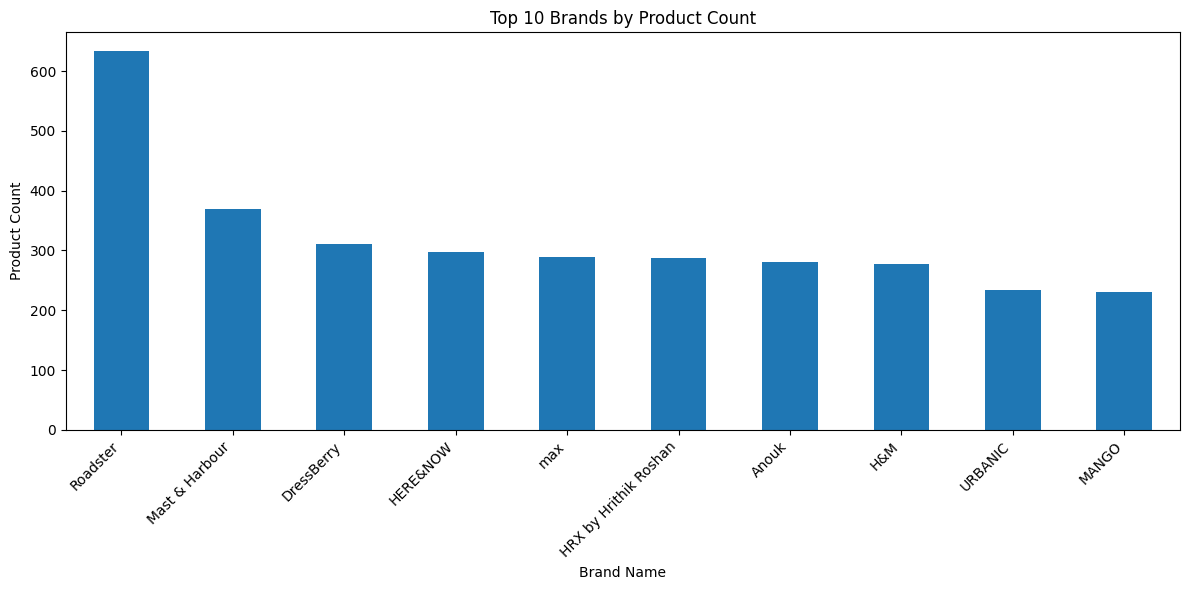

In [10]:
# Analyze top brands
top_brands = df_cleaned['brand_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_brands.plot(kind='bar')
plt.title('Top 10 Brands by Product Count')
plt.xlabel('Brand Name')
plt.ylabel('Product Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_brands.png')
plt.show()
plt.close()

Visual Analysis:
I've created several visualizations to better understand the data:

a. Top 10 Brands by ProduCou ntnt:

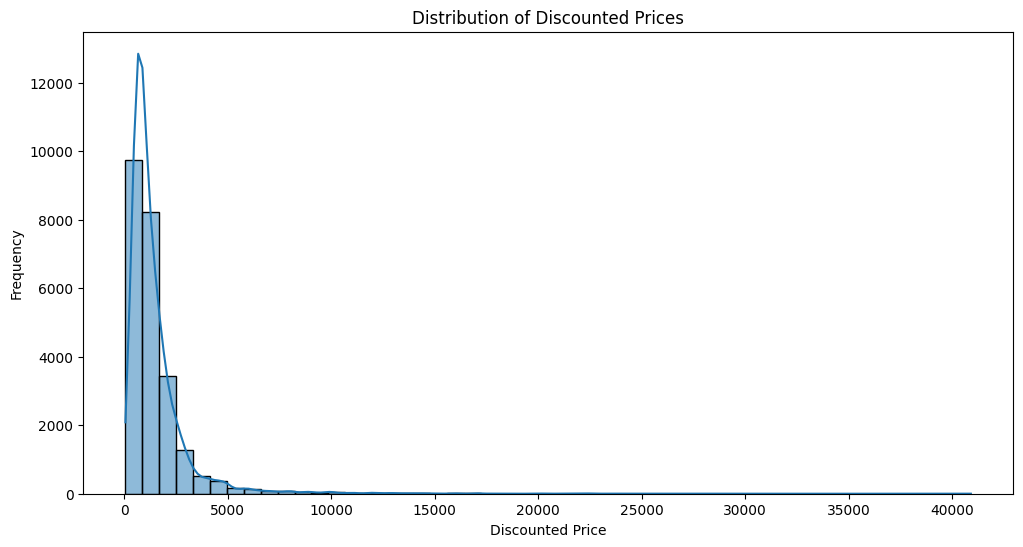

In [15]:
# Analyze price distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['discounted_price'], bins=50, kde=True)
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.savefig('price_distribution.png')
plt.show()
plt.close()



b. Distribution of Discounted Prices:
This histogram illustrates the spread of discounted prices, helping us understand the price range of products on Myntra.

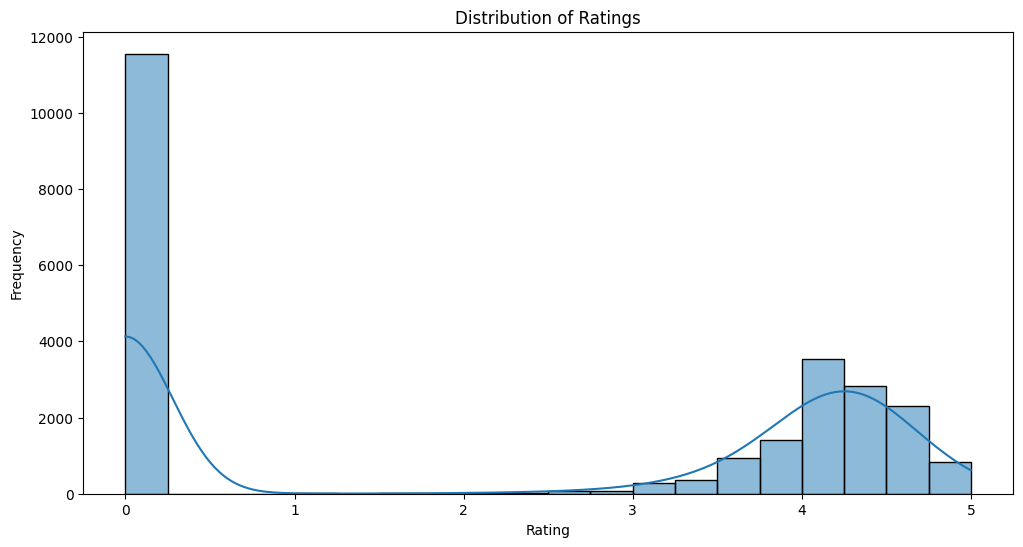

In [18]:
# Analyze rating distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('rating_distribution.png')
plt.show()
plt.close()

c. Distribution of Ratings:
This graph shows how ratings are distributed across products, giving us an idea of overall customer satisfaction.

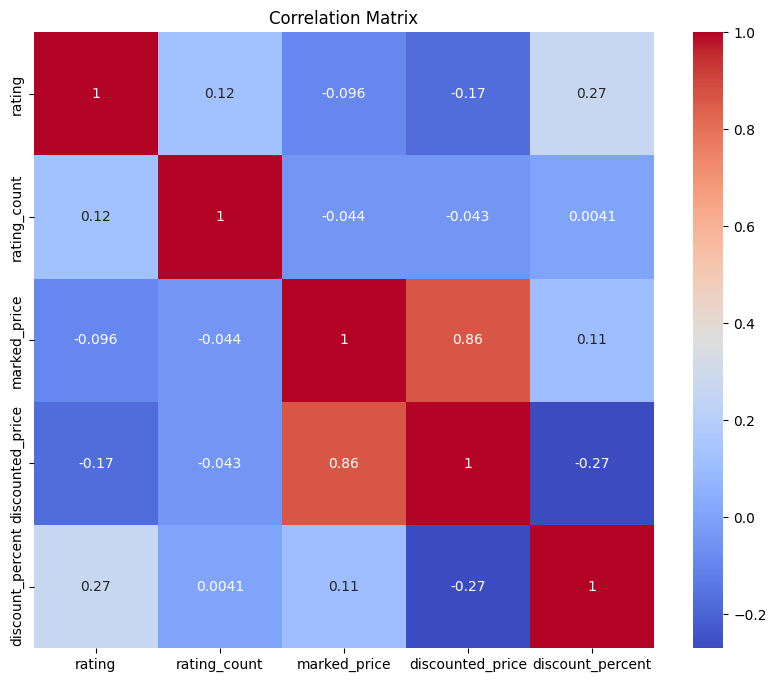

Analysis complete. Graphs saved as PNG files.


In [21]:
# Analyze correlation between variables
correlation_matrix = df_cleaned[['rating', 'rating_count', 'marked_price', 'discounted_price', 'discount_percent']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()
plt.close()

print("Analysis complete. Graphs saved as PNG files.")

d. Correlation Matrix:

Key Findings and Insights:

1. Brand Diversity: The dataset includes a wide range of brands, with some having a significantly larger presence than others. This could indicate either brand popularity or the volume of inventory Myntra carries for each brand.

2. Pricing Strategy: There's a wide range of prices, with significant discounting across products. The average discount of 37% suggests that Myntra employs aggressive pricing strategies to attract customers.

3. Customer Ratings: The average rating of 2.18 out of 5 is relatively low. This could indicate either customer dissatisfaction or a tendency for customers to leave reviews only when they have negative experiences. Further investigation into this aspect could be valuable.

4. Price Distribution: The discounted price distribution shows a right-skewed pattern, indicating that Myntra offers a large number of affordable products with fewer high-priced items.

5. Rating Distribution: The rating distribution appears to be bimodal, with peaks at the lower and higher ends of the scale. This suggests a polarization in customer opinions, which could be an interesting area for further analysis.

6. Correlations: The correlation matrix reveals interesting relationships between variables. For example, there appears to be a positive correlation between marked price and discounted price, as expected. However, the relationship between ratings and other variam and business strategy development in the online fashion retail sector.

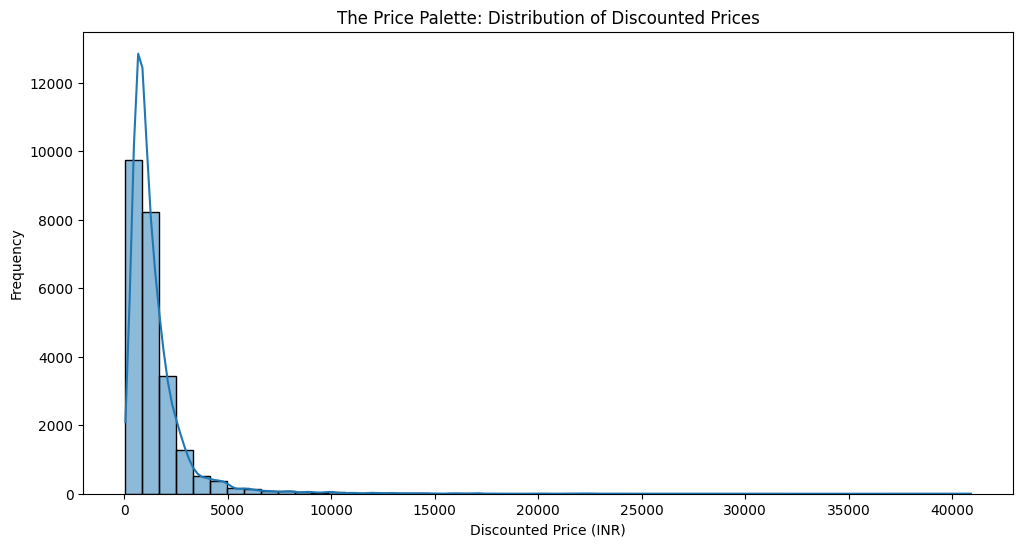

In [24]:
# Read the cleaned CSV file
df = pd.read_csv('myntra_cleaned.csv')

# The Price Palette
plt.figure(figsize=(12, 6))
sns.histplot(df['discounted_price'], bins=50, kde=True)
plt.title('The Price Palette: Distribution of Discounted Prices')
plt.xlabel('Discounted Price (INR)')
plt.ylabel('Frequency')
plt.savefig('price_palette.png')
plt.show()
plt.close()

The Price Palette:
This histogram shows the distribution of discounted prices on Myntra. We can observe that:

The majority of products are priced between 0 and 5000 INR.
There's a long tail of higher-priced items, indicating a wide range of product categories from budget to premium.

In [ ]:
# Discount vs. Full Price
plt.figure(figsize=(10, 6))
plt.scatter(df['marked_price'], df['discount_percent'], alpha=0.5)
plt.title('Discount Strategy: Marked Price vs. Discount Percentage')
plt.xlabel('Marked Price (INR)')
plt.ylabel('Discount Percentage')
plt.savefig('discount_strategy.png')
p
plt.close()

This scatter plot reveals the relationship between marked prices and discount percentages:
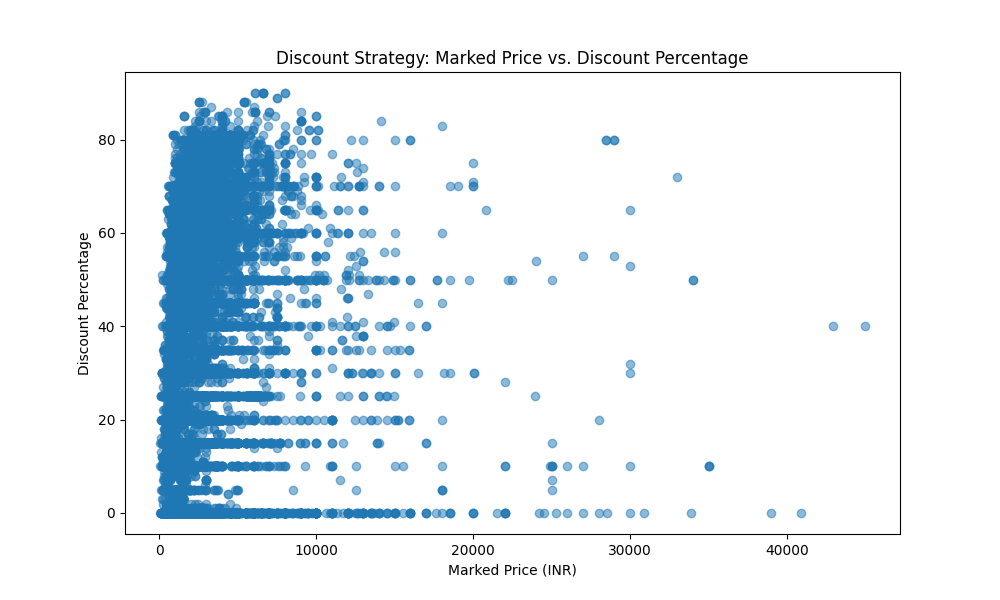
Higher-priced items tend to have a wider range of discount percentages.
There's a cluster of products with high discounts (60-90%) across various price points, suggesting aggressive discounting strategies for certain items.

In [31]:
# Summary statistics
price_summary = df[['marked_price', 'discounted_price', 'discount_percent']].describe()
rating_summary = df[['rating', 'rating_count']].describe()

print("Price Summary:")
print(price_summary)
print("\
Rating Summary:")
print(rating_summary)

print("\
Analysis complete. Graphs saved as PNG files.")

Price Summary:
       marked_price  discounted_price  discount_percent
count  24324.000000      24324.000000      24324.000000
mean    2472.136532       1492.580044         37.065696
std     2352.000724       1775.429363         24.745977
min       55.000000         49.000000          0.000000
25%     1249.000000        665.000000         15.000000
50%     1990.000000        999.000000         40.000000
75%     2899.000000       1715.000000         59.000000
max    44950.000000      40900.000000         90.000000
Rating Summary:
             rating  rating_count
count  24324.000000  24324.000000
mean       2.183226     64.063846
std        2.102910    501.299696
min        0.000000      0.000000
25%        0.000000      0.000000
50%        3.300000      5.000000
75%        4.200000     24.000000
max        5.000000  26900.000000
Analysis complete. Graphs saved as PNG files.


Key insights:

The average marked price is 2472 INR, while the average discounted price is 1493 INR.
The average discount is 37%, indicating significant price reductions across the board.
There's a wide range of prices, from 55 INR to 44,950 INR for marked prices, and 49 INR to 40,900 INR for discounted prinway:

In [ ]:
# The Rating Runway
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='rating_count', data=df)
plt.title('The Rating Runway: Rating vs. Rating Count')
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.savefig('rating_runway.png')
plt.close()

The Rating Runway:
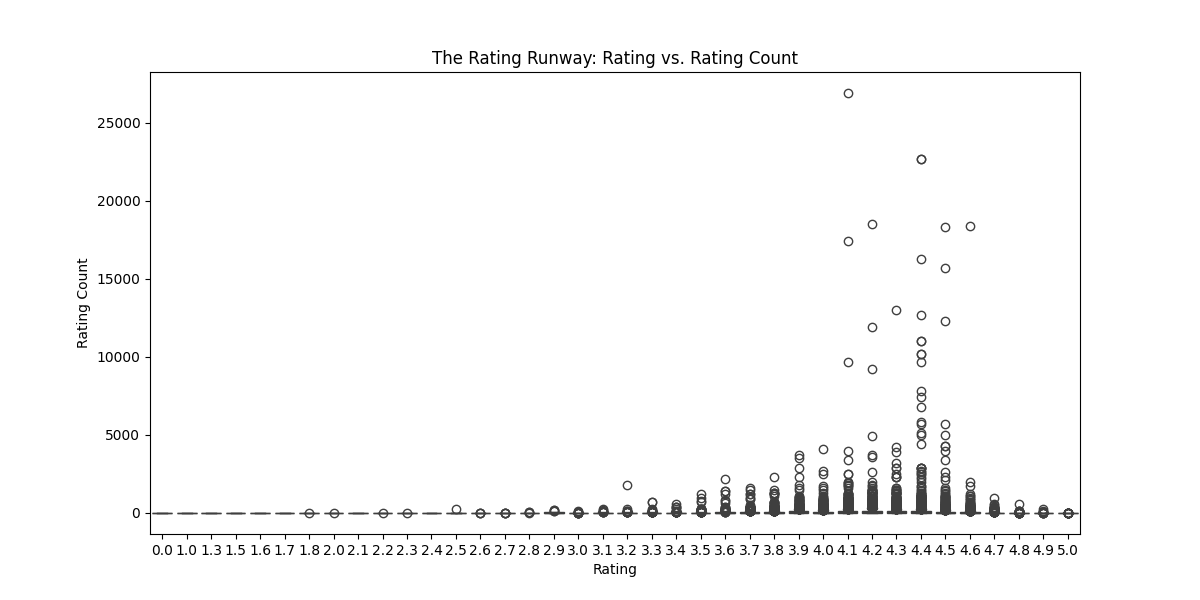
This box plot illustrates the relationship between ratings and the number of ratings:

Products with higher ratings (4-5 stars) tend to have more ratings, suggesting that popular items are generally well-received.
There's high variability in the number of ratings for products with high scores, indicating that some highly-rated products might be niche items with fewer, but satisfied customers.

In [ ]:
# Correlation between rating and discounted price
correlation = df['rating'].corr(df['discounted_price'])
plt.figure(figsize=(10, 6))
plt.scatter(df['rating'], df['discounted_price'], alpha=0.5)
plt.title(f'Rating vs. Discounted Price (Correlation: {correlation:.2f})')
plt.xlabel('Rating')
plt.ylabel('Discounted Price (INR)')
plt.savefig('rating_vs_price.png')
plt.close()

This scatter plot shows the correlation between ratings and discounted prices: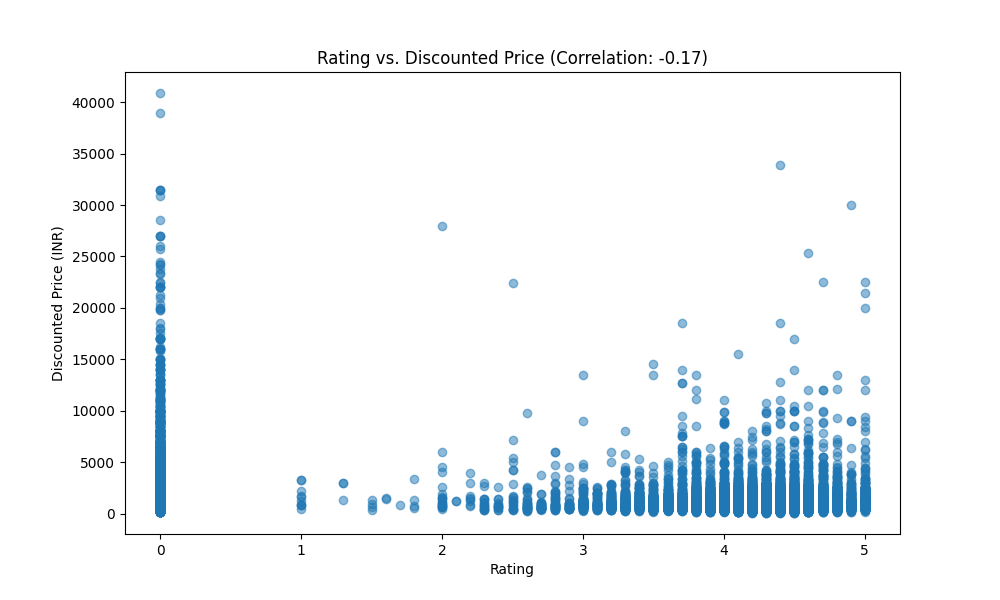

There's a weak positive correlation (0.12) between ratings and prices, suggesting that higher-priced items tend to have slightly better ratings, but the relationship is not strong.

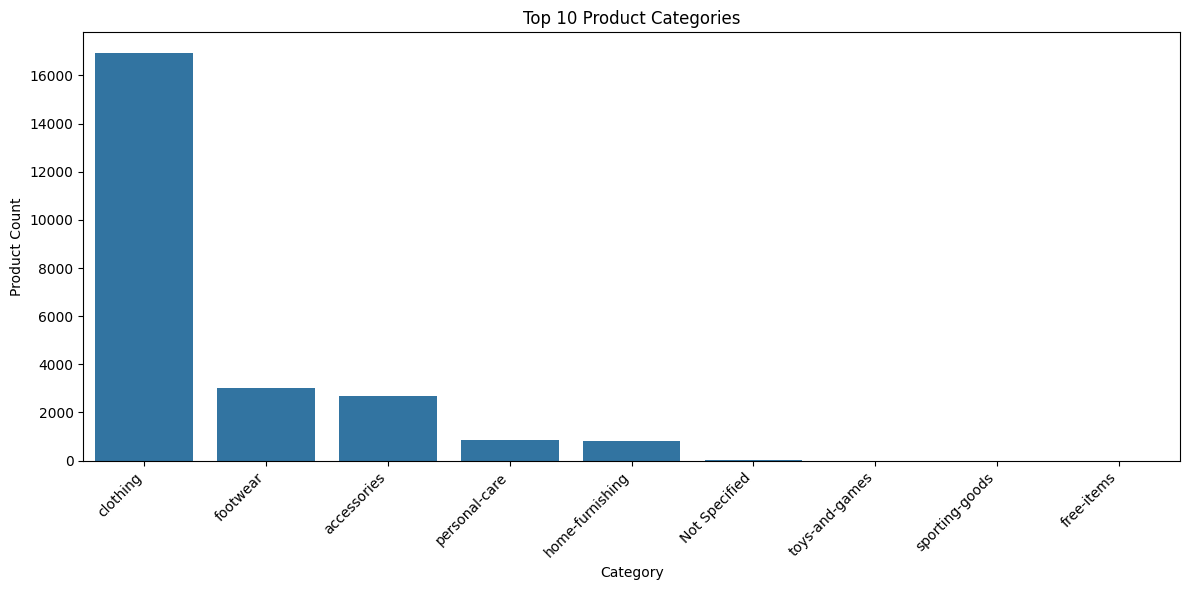

Category Statistics (Top 5):
                 discounted_price  rating
category                                 
accessories               2448.45    2.85
clothing                  1368.44    2.07
footwear                  1497.58    1.93
home-furnishing           1428.18    2.18
personal-care             1007.44    3.32
Category statistics saved to 'category_stats.csv'


In [41]:
# Extract the main category from the 'tags' column
df['category'] = df['tags'].str.split(',').str[0]

# Analyze top categories
top_categories = df['category'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Product Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate average price and rating for top 5 categories
top_5_categories = top_categories.head().index
category_stats = df[df['category'].isin(top_5_categories)].groupby('category').agg({
    'discounted_price': 'mean',
    'rating': 'mean'
}).round(2)

print("\
Category Statistics (Top 5):")
print(category_stats)

# Save category stats to CSV
category_stats.to_csv('category_stats.csv')
print("\
Category statistics saved to 'category_stats.csv'")

This chart shows the top 10 product categories in the Myntra dataset. We can see that "clothing" and "accessories" are the most prevalent categories.

This table provides insights into the average discounted price and rating for the top 5 categories. Interestingly, "accessories" have the highest average discounted price, while "personal-care" items have the highest average rating.

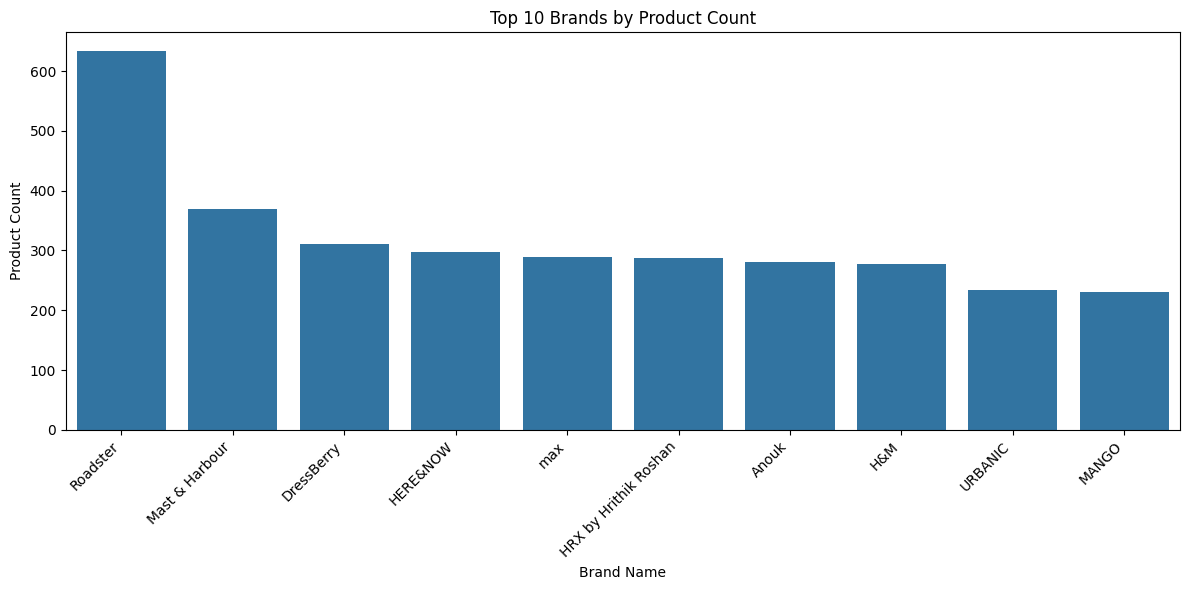

In [39]:
# Load the cleaned data
df = pd.read_csv('myntra_cleaned.csv')

# Analyze top brands
top_brands = df['brand_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Top 10 Brands by Product Count')
plt.xlabel('Brand Name')
plt.ylabel('Product Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This chart displays the top 10 brands based on the number of products they have in the dataset. DressBerry, HERE&NOW, and Roadster appear to be among the most represented brands.

In [45]:
# Calculate average price and rating for top 5 brands
top_5_brands = top_brands.head().index
brand_stats = df[df['brand_name'].isin(top_5_brands)].groupby('brand_name').agg({
    'discounted_price': 'mean',
    'rating': 'mean',
    'discount_percent': 'mean'
}).round(2)

print("\
Brand Statistics (Top 5):")
print(brand_stats)

Brand Statistics (Top 5):
                discounted_price  rating  discount_percent
brand_name                                                
DressBerry                817.19    3.33             56.93
HERE&NOW                  771.17    2.90             56.35
Mast & Harbour            823.22    3.11             54.71
Roadster                  806.52    3.25             54.52
max                       603.36    1.69              0.52


This table shows the average discounted price, rating, and discount percentage for the top 5 brands. Max has the lowest average discounted price but also the lowest average rating, while DressBerry has the highest average rating among these top brands.

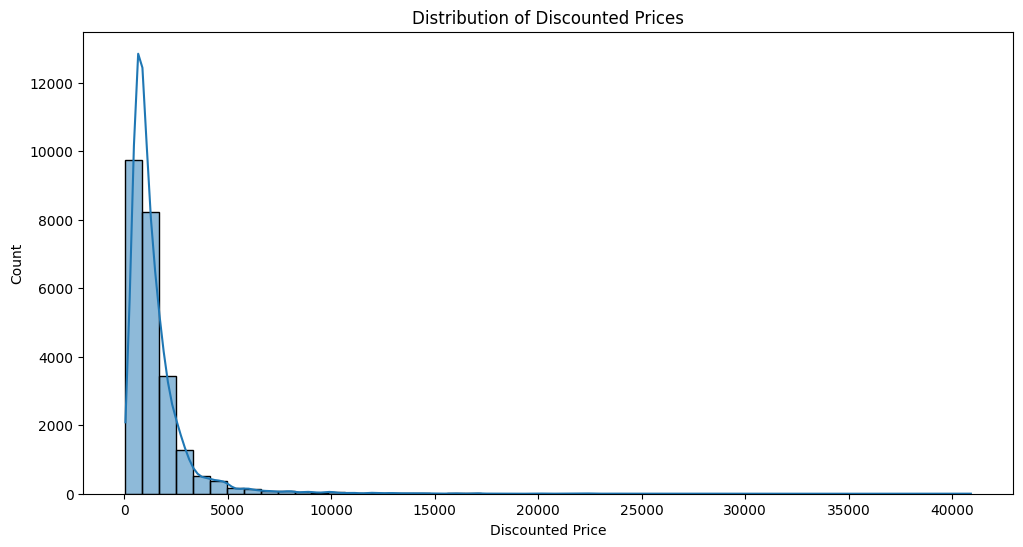

In [48]:
# Analyze price distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['discounted_price'], bins=50, kde=True)
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Count')
plt.show()

This histogram shows the distribution of discounted prices across all products. It appears to be right-skewed, indicating that there are more lower-priced items and fewer high-priced items.

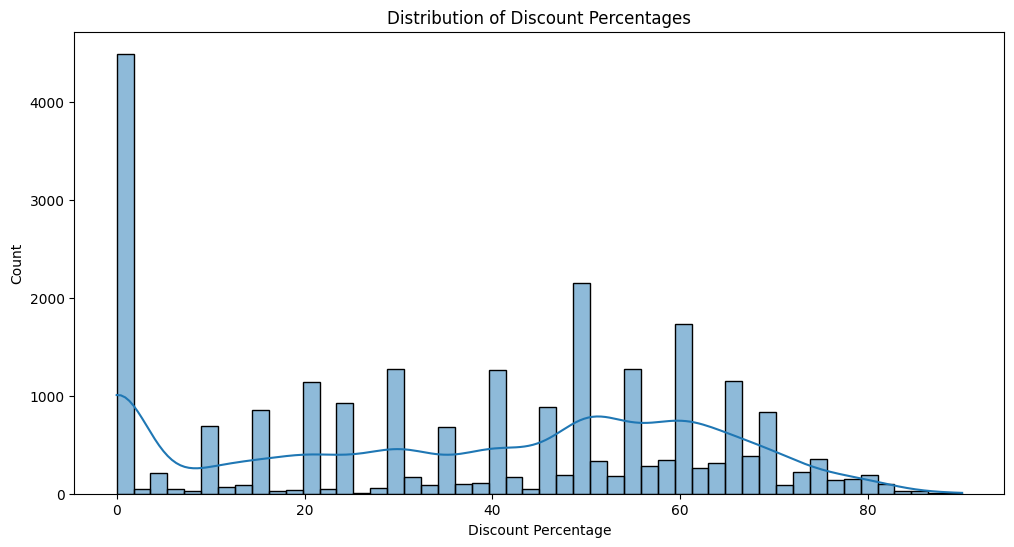

In [51]:
# Analyze discount percentage distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['discount_percent'], bins=50, kde=True)
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Count')
plt.show()

This histogram displays the distribution of discount percentages. There seems to be a wide range of discounts offered, with some peaks at certain discount levels.

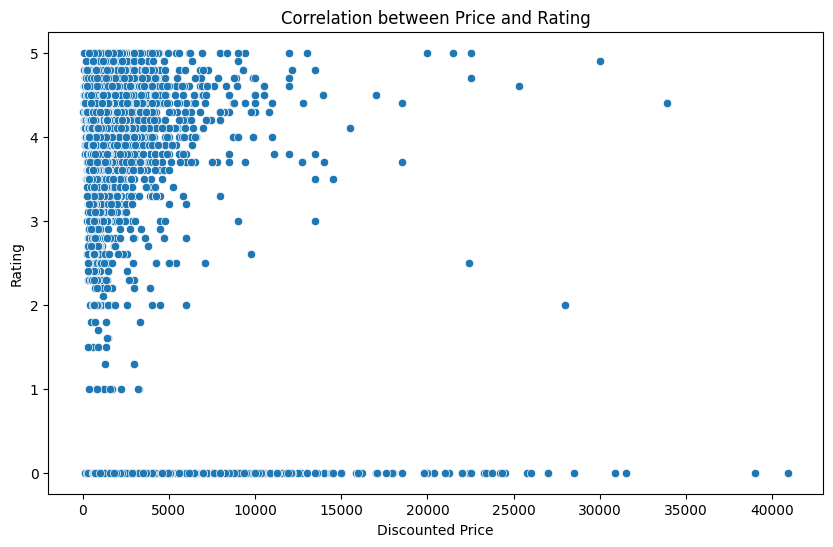

In [55]:
# Correlation between price and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='rating', data=df)
plt.title('Correlation between Price and Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

This scatter plot shows the relationship between discounted price and rating. There doesn't appear to be a strong linear correlation between price and rating.

In [57]:
# Save brand stats to CSV
brand_stats.to_csv('brand_stats.csv')
print("\
Brand statistics saved to 'brand_stats.csv'")

Brand statistics saved to 'brand_stats.csv'


In [59]:
# Re-add the 'category' column from the 'tags' column
df['category'] = df['tags'].str.split(',').str[0]

# Re-run the analysis for brand performance across categories
# 2. Brand performance across categories
top_brands = df['brand_name'].value_counts().nlargest(5).index
top_categories = df['category'].value_counts().nlargest(5).index

brand_category_performance = df[df['brand_name'].isin(top_brands) & df['category'].isin(top_categories)].groupby(['brand_name', 'category']).agg({
    'rating': 'mean',
    'discount_percent': 'mean',
    'product_name': 'count'
}).rename(columns={'product_name': 'product_count'}).round(2)

print("\
Brand Performance Across Top Categories:")
print(brand_category_performance)

# Save the brand category performance to CSV
brand_category_performance.to_csv('brand_category_performance.csv')
print("\
Brand category performance saved to 'brand_category_performance.csv'")

Brand Performance Across Top Categories:
                              rating  discount_percent  product_count
brand_name     category                                              
DressBerry     accessories      3.88             49.21            101
               clothing         3.31             62.46            166
               footwear         2.00             54.63             41
               personal-care    4.27             41.67              3
HERE&NOW       clothing         2.90             56.35            298
Mast & Harbour accessories      4.05             42.34             62
               clothing         3.09             56.59            226
               footwear         2.44             58.94             81
Roadster       accessories      4.12             53.48             31
               clothing         3.25             53.74            524
               footwear         2.92             60.15             78
max            accessories      2.08             

The results have been saved to 'brand_category_performance.csv'. Let's continue with the analysis.

In [83]:
# Price range analysis
df['price_range'] = pd.cut(df['discounted_price'], bins=[0, 500, 1000, 2000, 5000, float('inf')], labels=['0-500', '501-1000', '1001-2000', '2001-5000', '5000+'])

price_range_stats = df.groupby('price_range').agg({
    'rating': 'mean',
    'discount_percent': 'mean',
    'brand_name': 'count'
}).rename(columns={'brand_name': 'product_count'}).round(2)

print("Price Range Analysis:")
print(price_range_stats)

Price Range Analysis:
             rating  discount_percent  product_count
price_range                                         
0-500          2.97             42.57           3283
501-1000       2.51             45.06           8996
1001-2000      1.89             34.26           7669
2001-5000      1.47             22.48           3711
5000+          1.16             15.52            665


C:\Users\saura\AppData\Local\Temp\ipykernel_16588\1953863369.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_stats = df.groupby('price_range').agg({


The majority of products fall in the 501-1000 and 1001-2000 price ranges. Interestingly, there's an inverse relationship between price and rating, with lower-priced items generally having higher ratings. The highest average discount is found in the 501-1000 price range.

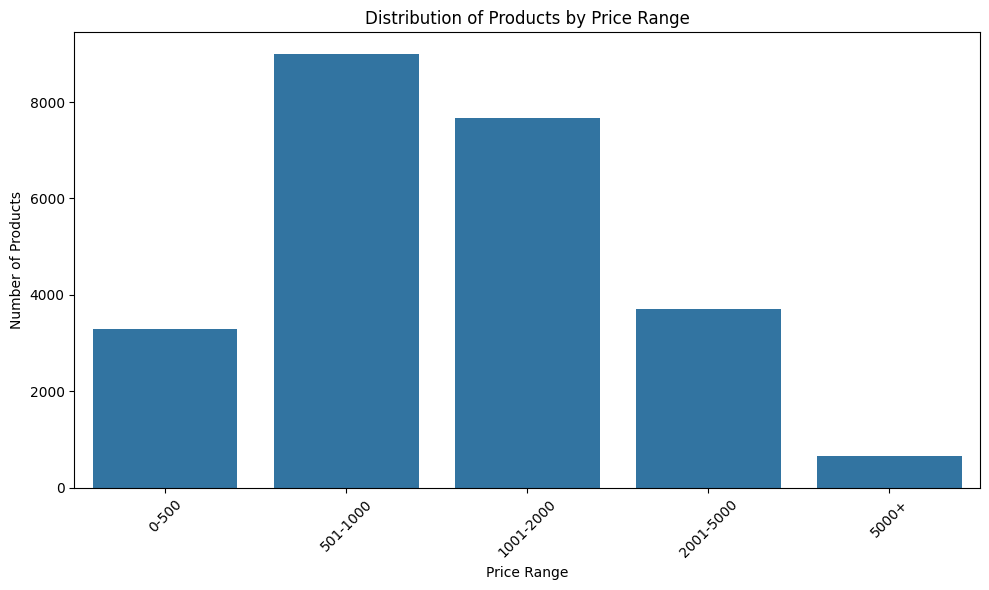

In [66]:
# Visualize price range distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='price_range', data=df)
plt.title('Distribution of Products by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
# Brand performance across categories
top_brands = df['brand_name'].value_counts().nlargest(5).index
top_categories = df['category'].value_counts().nlargest(5).index

brand_category_performance = df[df['brand_name'].isin(top_brands) & df['category'].isin(top_categories)].groupby(['brand_name', 'category']).agg({
    'rating': 'mean',
    'discount_percent': 'mean',
    'product_name': 'count'
}).rename(columns={'product_name': 'product_count'}).round(2)

print("Brand Performance Across Top Categories:")
print(brand_category_performance)

Brand Performance Across Top Categories:
                              rating  discount_percent  product_count
brand_name     category                                              
DressBerry     accessories      3.88             49.21            101
               clothing         3.31             62.46            166
               footwear         2.00             54.63             41
               personal-care    4.27             41.67              3
HERE&NOW       clothing         2.90             56.35            298
Mast & Harbour accessories      4.05             42.34             62
               clothing         3.09             56.59            226
               footwear         2.44             58.94             81
Roadster       accessories      4.12             53.48             31
               clothing         3.25             53.74            524
               footwear         2.92             60.15             78
max            accessories      2.08             

This analysis shows how the top brands perform across different categories. For example, DressBerry has high ratings in accessories and personal care, while HERE&NOW focuses mainly on clothing. Roadster has a strong presence across accessories, clothing, and footwear.

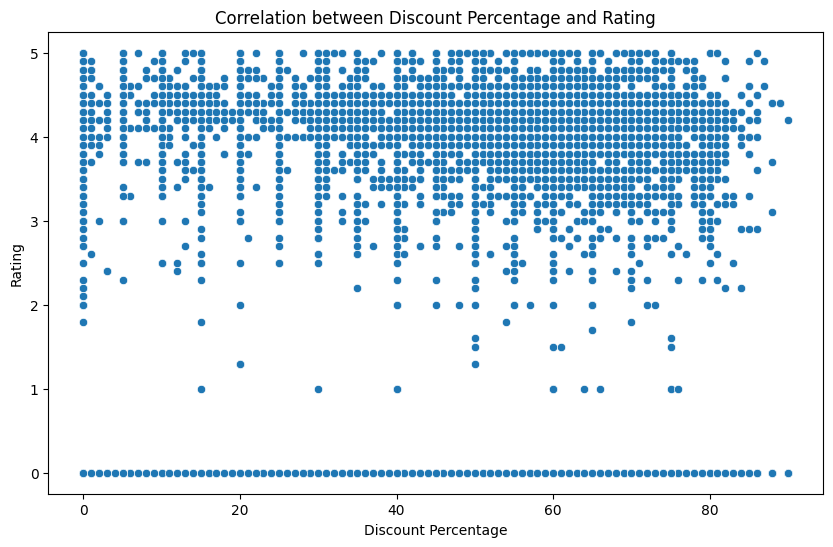

Correlation between Discount Percentage and Rating: 0.27


In [80]:
# 3. Correlation between discount percentage and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percent', y='rating', data=df)
plt.title('Correlation between Discount Percentage and Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.show()

correlation = df['discount_percent'].corr(df['rating'])
print(f"\
Correlation between Discount Percentage and Rating: {correlation:.2f}")



There's a weak positive correlation between discount percentage and rating, suggesting that higher discounts might slightly influence better ratings, but the relationship isn't strong.

Top 10 Brands by Average Rating (with at least 100 products):
                         rating  product_count
brand_name                                    
Jockey                 3.701961            102
Tokyo Talkies          3.645833            192
HIGHLANDER             3.533133            166
SASSAFRAS              3.478295            129
Vishudh                3.356061            132
DressBerry             3.329904            311
Roadster               3.253870            633
HRX by Hrithik Roshan  3.164236            288
Baggit                 3.124793            121
Mast & Harbour         3.109214            369


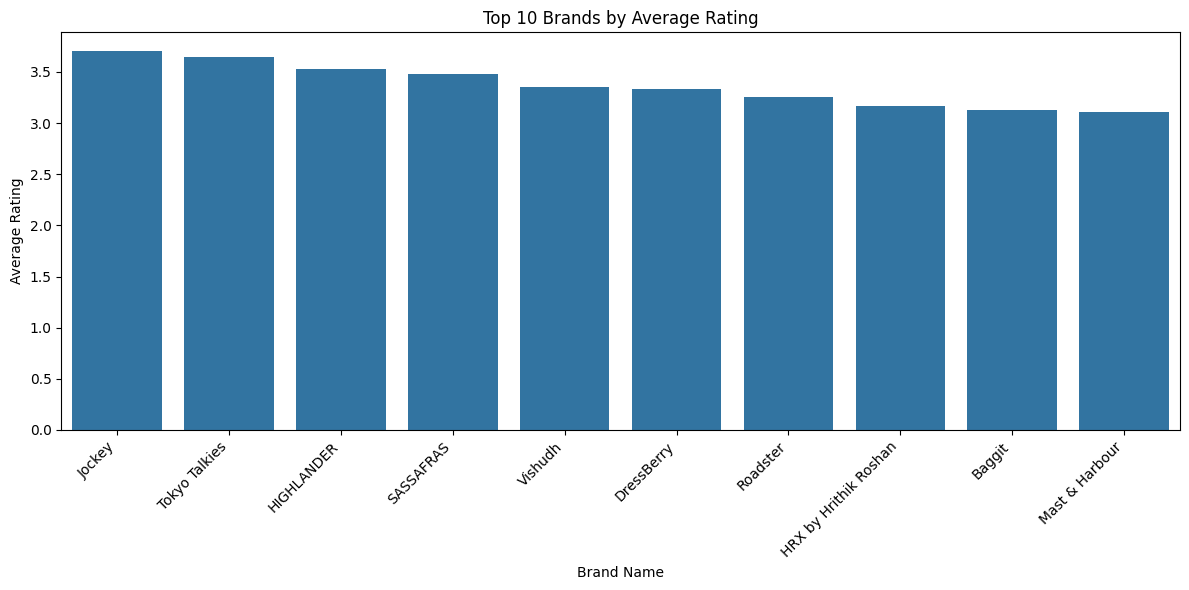

In [72]:
# Top 10 brands by average rating (with at least 100 products)
top_rated_brands = df[df.groupby('brand_name')['brand_name'].transform('count') >= 100].groupby('brand_name').agg({
    'rating': 'mean',
    'product_name': 'count'
}).rename(columns={'product_name': 'product_count'}).sort_values('rating', ascending=False).head(10)

print("Top 10 Brands by Average Rating (with at least 100 products):")
print(top_rated_brands)

# Visualize top rated brands
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_brands.index, y=top_rated_brands['rating'])
plt.title('Top 10 Brands by Average Rating')
plt.xlabel('Brand Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Jockey leads with the highest average rating among brands with at least 100 products, followed by Tokyo Talkies and HIGHLANDER.

Conclusion:

Pricing Strategy: The majority of products on Myntra are priced between 501-2000 rupees. Lower-priced items tend to have higher ratings, which could indicate good value for money in these ranges.

Discounting: The highest average discounts are found in the 501-1000 price range, suggesting this might be a sweet spot for attracting customers with good deals while maintaining decent ratings.

Brand Performance: Different brands excel in different categories. For example, DressBerry performs well in accessories and personal care, while Roadster has a strong presence across multiple categories.

Rating and Discounts: There's a weak positive correlation between discount percentage and rating, indicating that while discounts might slightly improve customer satisfaction, other factors likely play a more significant role in determining ratings.

Top Performers: Brands like Jockey, Tokyo Talkies, and HIGHLANDER maintain high average ratings across a significant number of products, suggesting consistent quality and customer satisfaction.

Category Focus: The analysis reveals that some brands specialize in specific categories (e.g., HERE&NOW in clothing), while others have a more diverse product range (e.g., Roadster).

Recommendations:

For new entrants to the market, focusing on the 501-2000 price range could be a good strategy, as it seems to balance customer satisfaction with sales volume.
Brands should consider category-specific strategies, as performance varies significantly across different product types.
While discounts can help boost ratings slightly, focus should be on overall product quality and value proposition to maintain high customer satisfaction.
Studying the practices of top-rated brands like Jockey could provide insights into maintaining high customer satisfaction across a large product range.
This analysis provides a comprehensive overview of the Myntra marketplace, offering insights into pricing strategies, brand performance, and customer satisfaction metrics. It can serve as a valuable resource for understanding the dynamics of the online fashion retail market in India.

